In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('../MLDeploy/AmesHousing.csv')
# print how many rows and columns
print(data.shape)
# visualize the dataset
data.head()

(2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
data.drop(['Order','PID'], axis=1, inplace=True)
data.shape

(2930, 80)

### Data Analysis

Text(0.5, 0, 'House price')

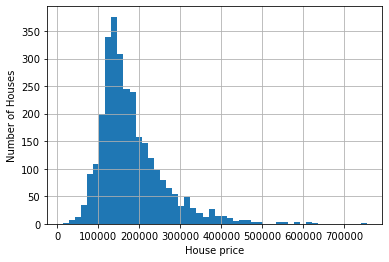

In [4]:
data['SalePrice'].hist(bins=50)
plt.ylabel('Number of Houses')
plt.xlabel('House price')

The target is continous and appear to be skewed to the right

Text(0.5, 0, 'log of House price')

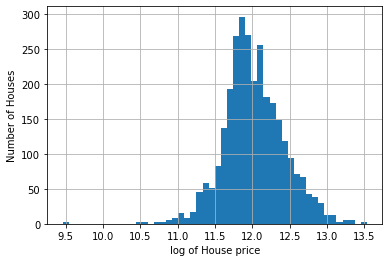

In [5]:
# log transform the target to improve the value spread 
np.log(data['SalePrice']).hist(bins=50)
plt.ylabel('Number of Houses')
plt.xlabel('log of House price')

The distribution has been transformed and now looks Gaussian

### Identify variable types

In [6]:
# Identify the Categorical variables

cat_vars = [var for var in data.columns if data[var].dtype=='O']
# MS SubClass is categorical
cat_vars = cat_vars + ['MS SubClass']
len(cat_vars)

44

In [7]:
# cast all variables as type 'O'

data[cat_vars] = data[cat_vars].astype('O')

In [8]:
# Identify numerical variables
num_vars = [var for var in data.columns if var not in cat_vars and var != 'SalePrice']

len(num_vars)

35

### Missing values

In [9]:
# Make a list of variables that contain missing variables
vars_with_na= [var for var in data.columns if data[var].isnull().sum()>0]

# display ordered percentage of missing values
data[vars_with_na].isnull().mean().sort_values(ascending=False)

Pool QC           0.995563
Misc Feature      0.963823
Alley             0.932423
Fence             0.804778
Fireplace Qu      0.485324
Lot Frontage      0.167235
Garage Cond       0.054266
Garage Qual       0.054266
Garage Finish     0.054266
Garage Yr Blt     0.054266
Garage Type       0.053584
Bsmt Exposure     0.028328
BsmtFin Type 2    0.027645
BsmtFin Type 1    0.027304
Bsmt Qual         0.027304
Bsmt Cond         0.027304
Mas Vnr Area      0.007850
Mas Vnr Type      0.007850
Bsmt Half Bath    0.000683
Bsmt Full Bath    0.000683
Total Bsmt SF     0.000341
Bsmt Unf SF       0.000341
Garage Cars       0.000341
Garage Area       0.000341
BsmtFin SF 2      0.000341
BsmtFin SF 1      0.000341
Electrical        0.000341
dtype: float64

In [10]:
print(len(vars_with_na))

27


4 variables have large proportion of missing values, the majority have small percentage missing

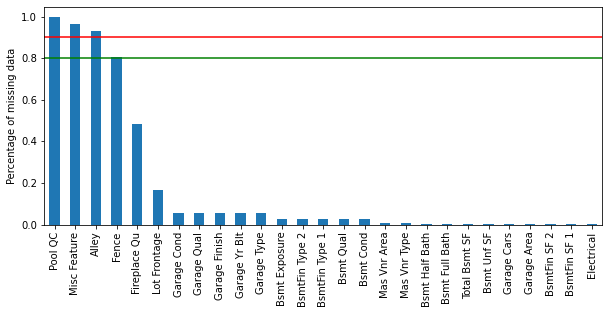

In [11]:
# plot the missing values
data[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10,4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=.9, color='r', linestyle='-')
plt.axhline(y=.8, color='g', linestyle='-')

In [12]:
# separate and count categorical and numerical variables with na

cat_vars_na = [var for var in cat_vars  if var in vars_with_na]
num_vars_na = [var for var in num_vars if var in vars_with_na]

print('Number of categorical variables with missing values',len(cat_vars_na))
print('Number of numerical variables with missing values',len(num_vars_na))

Number of categorical variables with missing values 16
Number of numerical variables with missing values 11


In [13]:
num_vars_na

['Lot Frontage',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area']

In [14]:
cat_vars_na

['Alley',
 'Mas Vnr Type',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Electrical',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

### Relationship between variables with missing data and SalePrice


In [15]:
def analyze_na_variable(data,var):
    # make a copy of the dataframe so original data is not overwritten
    data = data.copy()
    
    # make a interimg variable that indicates 1 if the value/observation is 
    # missing and 0 otherwise
    data[var] = np.where(data[var].isnull(),1,0)
    
    # compare median SalePrice between grouped 1 and 0 of observations
    # capture in a temporary dataset
    
    tmp = data.groupby(var)['SalePrice'].agg(['mean', 'std'])
    
    # plot into bar graph
    tmp.plot(kind='barh', y='mean', legend=False,
            xerr='std', title='Sale Price', color='g')
    
    plt.show()

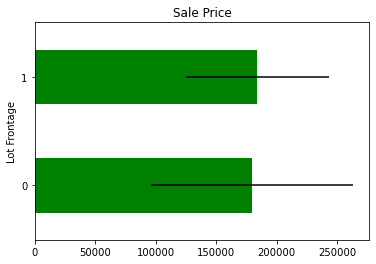

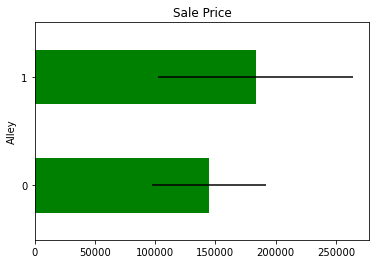

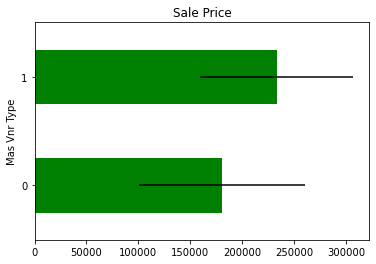

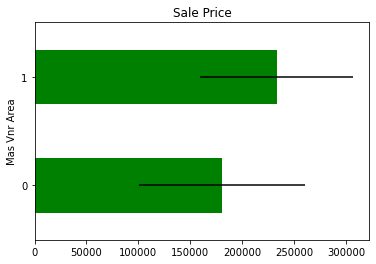

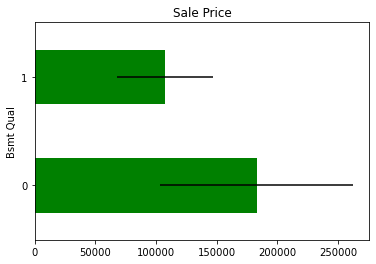

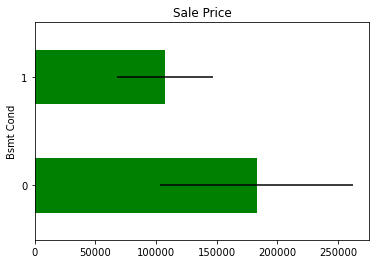

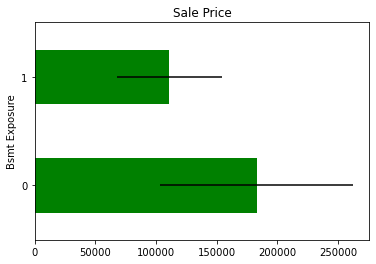

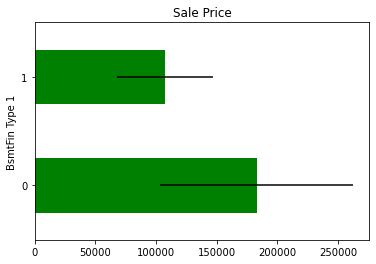

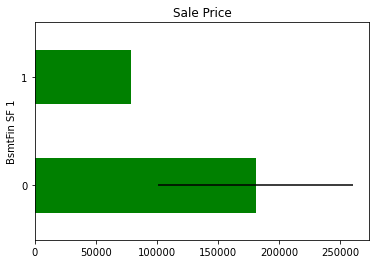

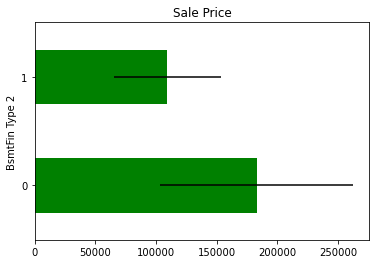

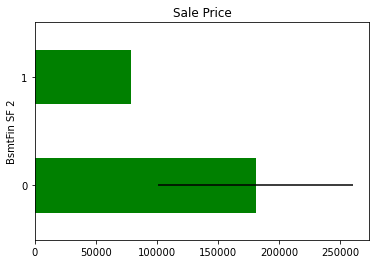

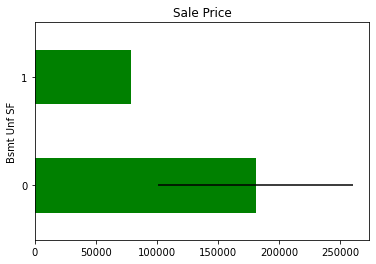

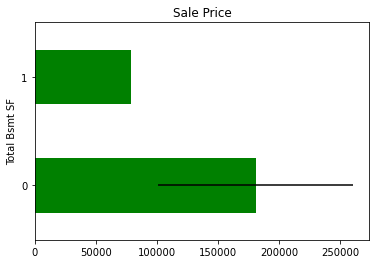

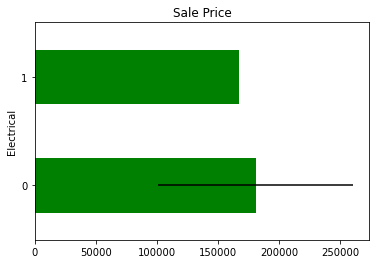

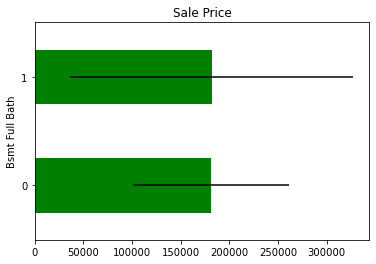

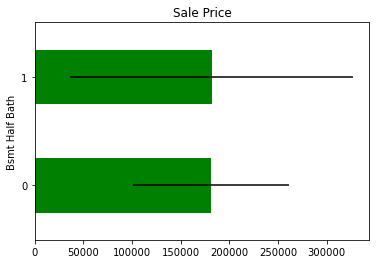

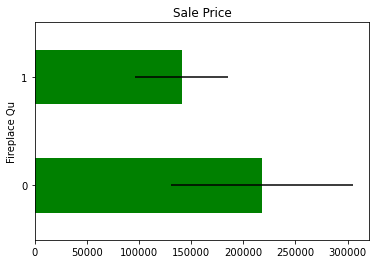

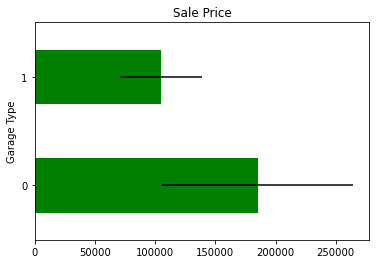

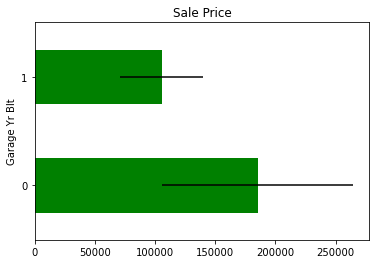

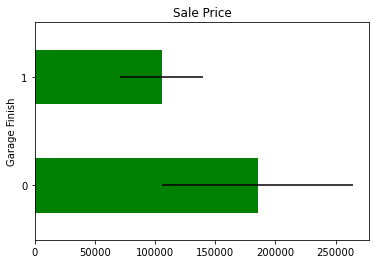

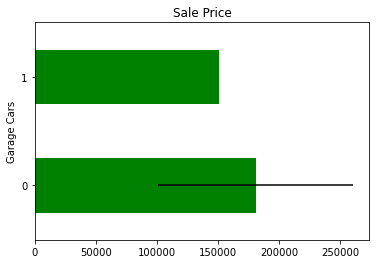

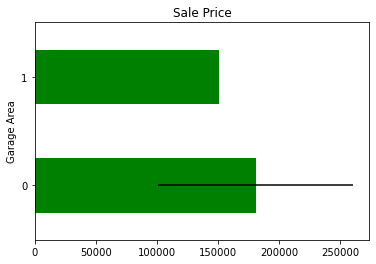

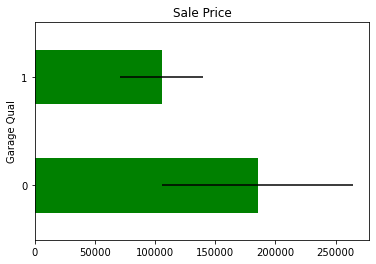

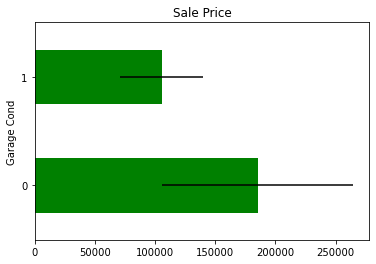

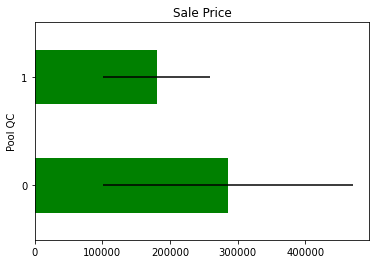

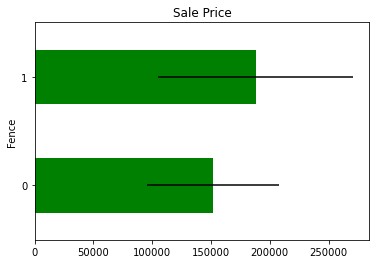

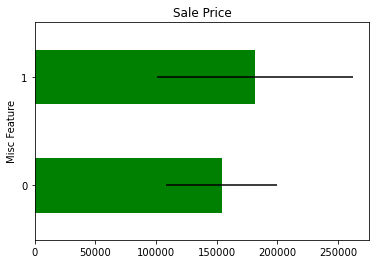

In [16]:
for var in vars_with_na:
    analyze_na_variable(data, var)

In some variables, there appear to be difference in the average sale price between those that have missing variables and those that don't. This suggest that missing variables can be a predictor of the sale price.

### Numerical Variables

In [17]:
print('Number of numerical variables: ', len(num_vars))

data[num_vars].head()

Number of numerical variables:  35


,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,4,2010
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010


### Temporal Variables

4 variables that relate to year
* Year Built
* Year Remod/Add 
* Garage Yr Blt
* Yr Sold

In [18]:
# list that contain time information

year_var = [var for var in num_vars if 'Yr' in var or 'Year' in var]
year_var

['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Yr Sold']

In [19]:
# Explore the values of the temporal variables

for var in year_var:
    print(var, data[var].unique())
    print()

Year Built [1960 1961 1958 1968 1997 1998 2001 1992 1995 1999 1993 1990 1985 2003
 1988 2010 1951 1978 1977 1974 2000 1970 1971 1975 2009 2007 2005 2004
 2002 2006 1996 1994 2008 1980 1979 1984 1920 1965 1967 1963 1962 1976
 1972 1966 1959 1964 1950 1952 1949 1940 1954 1955 1957 1956 1953 1948
 1900 1910 1927 1915 1945 1929 1938 1923 1928 1890 1885 1922 1925 1939
 1942 1936 1930 1921 1912 1917 1907 1875 1969 1947 1946 1987 1941 1924
 1914 1931 1919 1989 1896 1973 1991 1981 1986 1916 1926 1935 1892 1898
 1880 1882 1937 1902 1934 1982 1983 1932 1918 1904 1905 1872 1893 1906
 1908 1911 1895 1879 1901 1913]

Year Remod/Add [1960 1961 1958 1968 1998 2001 1992 1996 1999 1994 2007 1990 1985 2003
 2005 2010 1951 1988 1977 1974 2000 1970 2008 1971 1975 1978 2006 2004
 2002 1995 2009 1980 1979 1984 1981 1950 1967 1963 1993 1966 1959 1964
 1954 1972 1989 1957 1956 1952 1955 1962 1997 1965 1969 1987 1976 1991
 1973 1986 1983 1953 1982]

Garage Yr Blt [1960. 1961. 1958. 1968. 1997. 1998. 2001. 1992

Text(0, 0.5, 'Median House Price')

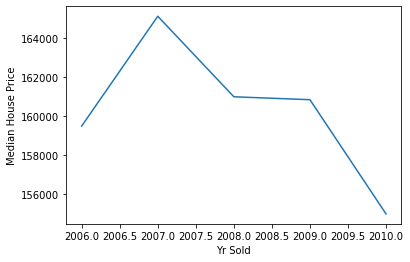

In [20]:
# plot the median sale price vs the year it was sold

data.groupby('Yr Sold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

It appears that there has been a drop in the house price, which isn't usually the case. House prices tend to go up.

Text(0, 0.5, 'Median House Price')

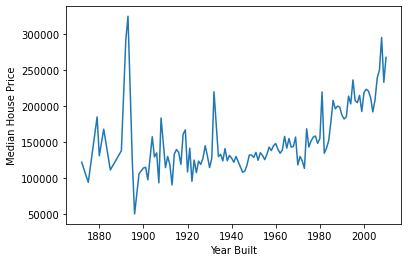

In [21]:
# plot the median sale price vs the year ti was built

data.groupby('Year Built')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

It appears that newly built houses are more expensive, maybe older houses were sold lately.

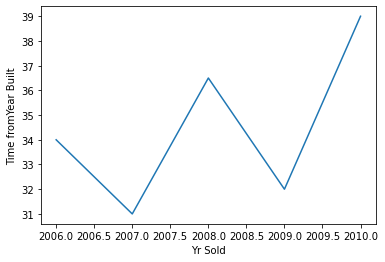

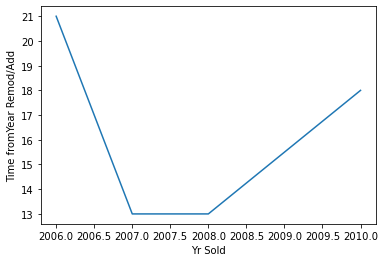

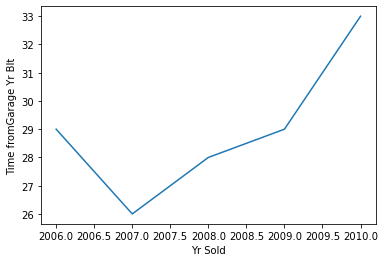

In [22]:
# capture the elapsed years between year variables and when it was sold
def analyse_year_vars(df, var):
    df = df.copy()
    
    df[var] = df['Yr Sold'] - df[var]
    df.groupby('Yr Sold')[var].median().plot()
    plt.ylabel('Time from' + var)
    plt.show()

for var in year_var:
    if var !='Yr Sold':
        analyse_year_vars(data, var)

It appears that towards 2010, older houses have been sold, had not been remodelled lately, and had older garages which could explain why house prices came down. 

In [23]:
# error in dataset
data.loc[2260,'Garage Yr Blt']=2007

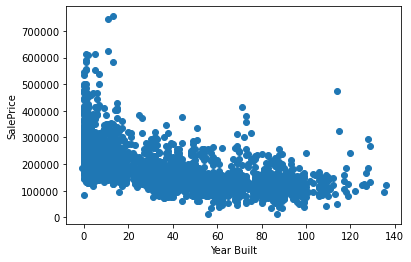

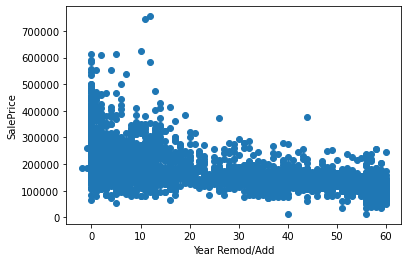

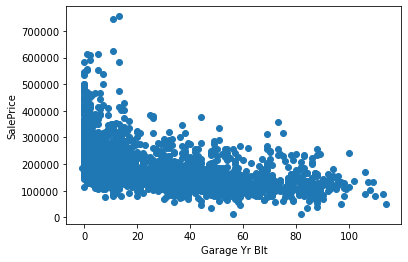

In [24]:
# plot the time since remodelled/built to see any relationship

def analyse_year_vars(df,var):
    
    df = data.copy()
    
    df[var] = df['Yr Sold'] - df[var]
    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()
    
for var in year_var:
    if var !='Yr Sold':
        analyse_year_vars(data, var)

The previous graphs show there is a deccrasing trend in house prices where if the house or renovation is older, the price of sale is lower.

### Discrete Variables

In [25]:
# make a list of all discrete variables

discrete_vars = [var for var in num_vars if len(data[var].unique())<20
                and var not in year_var]

print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  13


In [26]:
data[discrete_vars].head()

,Overall Qual,Overall Cond,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Pool Area,Mo Sold
0,6,5,1.0,0.0,1,0,3,1,7,2,2.0,0,5
1,5,6,0.0,0.0,1,0,2,1,5,0,1.0,0,6
2,6,6,0.0,0.0,1,1,3,1,6,0,1.0,0,6
3,7,5,1.0,0.0,2,1,3,1,8,2,2.0,0,4
4,5,5,0.0,0.0,2,1,3,1,6,1,2.0,0,3


The discrete variables are made up of quality variables and number of units, and is expected that higher numbers mean higher sale prices.

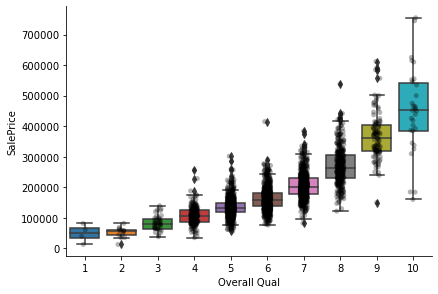

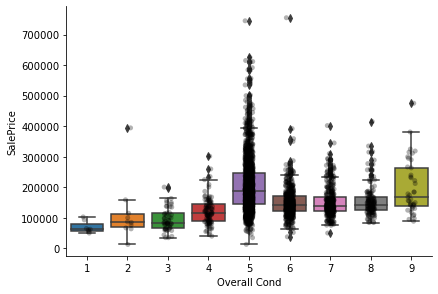

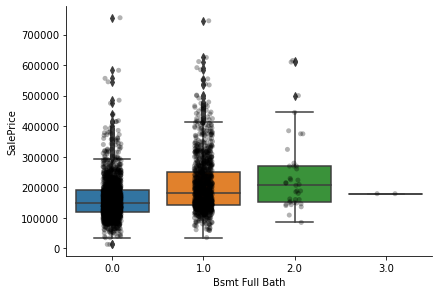

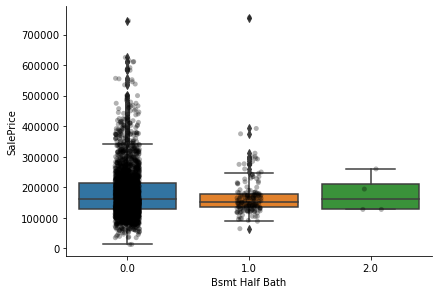

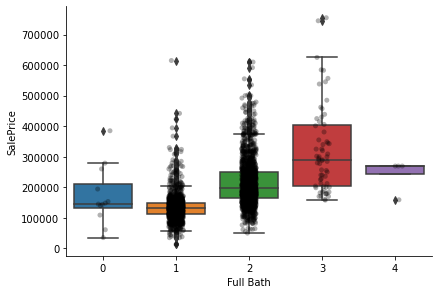

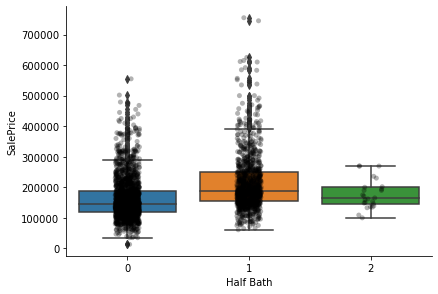

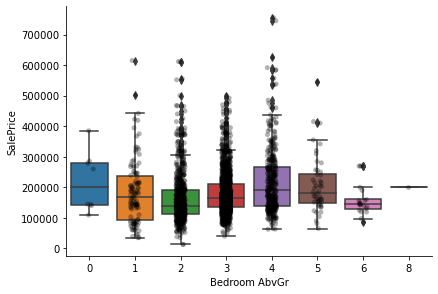

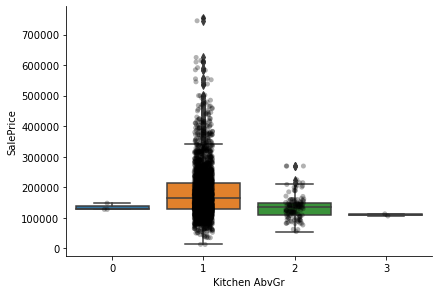

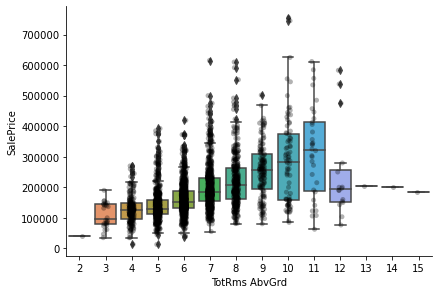

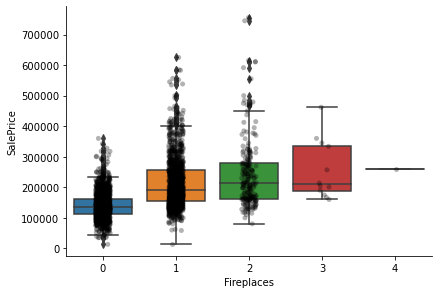

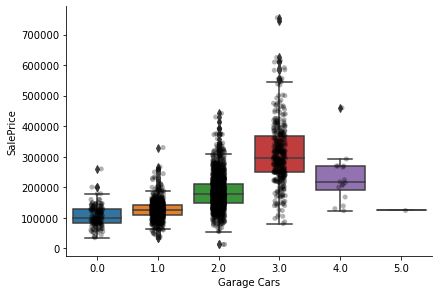

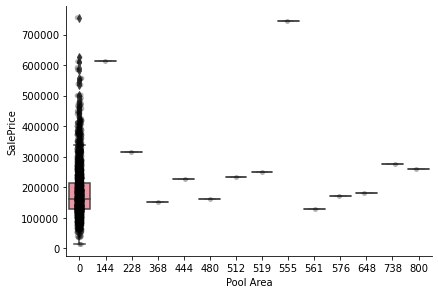

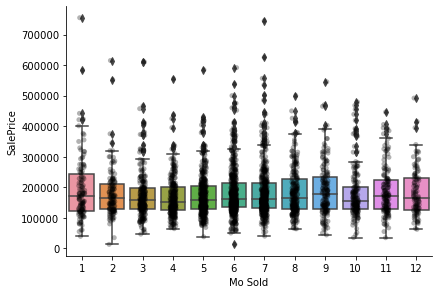

In [27]:
# create plots to show relationship of discrete variables to sale price

for var in discrete_vars:
    sns.catplot(x=var, y='SalePrice', data=data, kind='box', height=4,
               aspect=1.5)
    # to add datapoints in the boxplots, use stripplot
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3,
                 color='k')
    plt.show()

For most discrete numerical variables, they show an increase in sale price with an increase in quality or overall condition or number of units. Some do not show this trend and most likely means that this variable is not a good predictor of sale price.

### Continous Variables

In [28]:
# make a list of continous variables
cont_vars = [var for var in num_vars if var not in discrete_vars + year_var]
print('Number of continous variables: ',len(cont_vars))
data[cont_vars].head()

Number of continous variables:  18


,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Misc Val
0,141.0,31770,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,528.0,210,62,0,0,0,0
1,80.0,11622,0.0,468.0,144.0,270.0,882.0,896,0,0,896,730.0,140,0,0,0,120,0
2,81.0,14267,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,312.0,393,36,0,0,0,12500
3,93.0,11160,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,522.0,0,0,0,0,0,0
4,74.0,13830,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,482.0,212,34,0,0,0,0


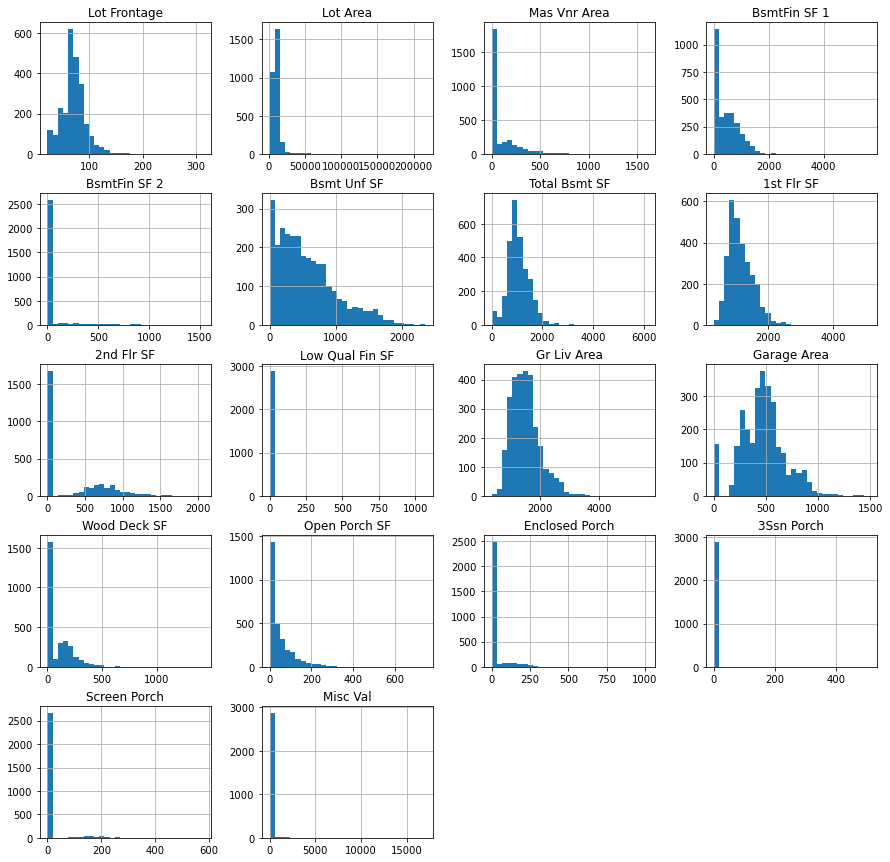

In [29]:
# plot the histograms of the continous variables

data[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

The variables are not normally distributed. Some of the techniques used in machine learning, especially in linear regression assumes normality of distribution of variables. 

Transforming the value spread can improve model performance but it is unlikely that transformation of super skewed variables will improve the distribution dramtically.

In [30]:
# create a list of super skewed variables
skewed = ['BsmtFin SF 2', 'Low Qual Fin SF', 'Enclosed Porch',
    '3Ssn Porch', 'Screen Porch', 'Misc Val']

In [31]:
# capture remaining continous variables
cont_vars = [
    'Lot Frontage',
    'Lot Area',
    'Mas Vnr Area',
    'BsmtFin SF 1',
    'Bsmt Unf SF',
    'Total Bsmt SF',
    '1st Flr SF',
    '2nd Flr SF',
    'Gr Liv Area',
    'Garage Area',
    'Wood Deck SF',
    'Open Porch SF',
]

### Yeo-Johnson Transformation

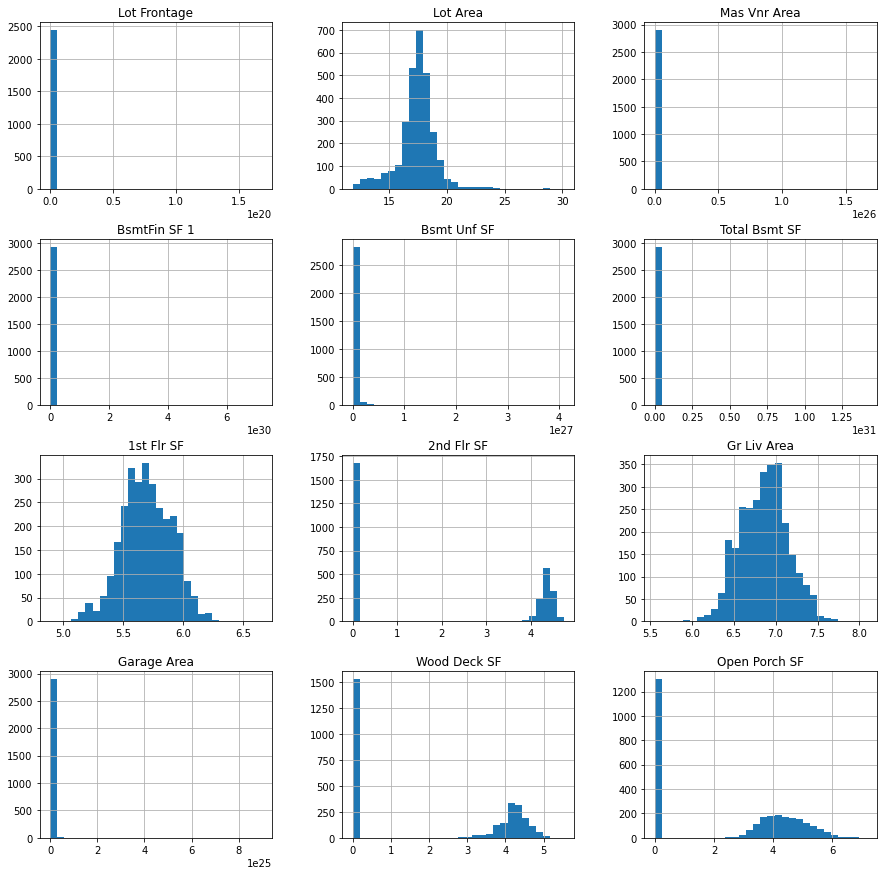

In [32]:
import scipy.stats as stats
tmp = data.copy()

for var in cont_vars:
    tmp[var], param = stats.yeojohnson(data[var])

# plot the histograms of the transformed variables
tmp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

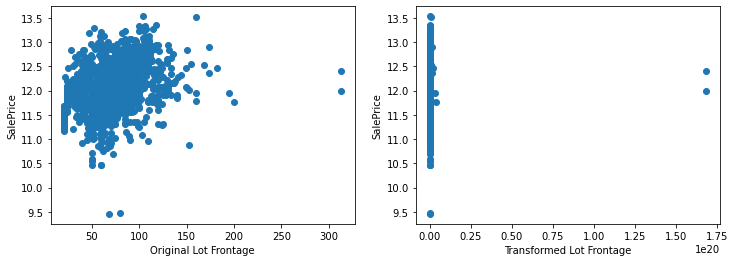

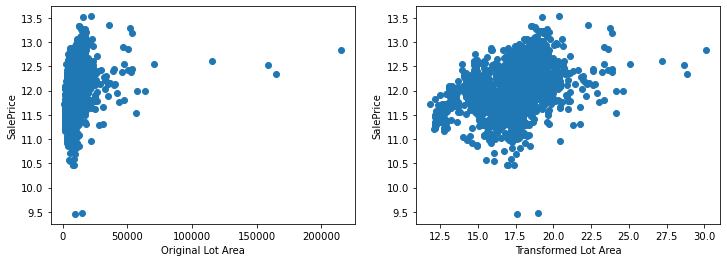

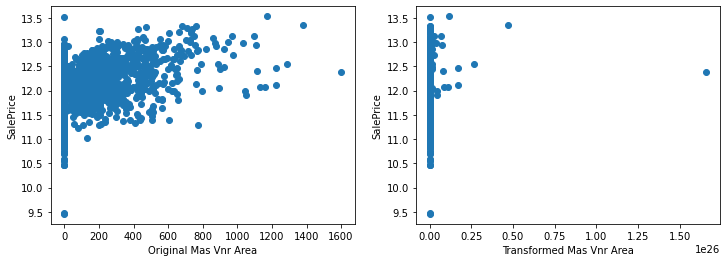

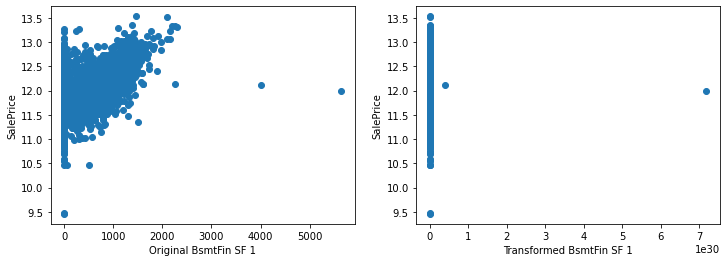

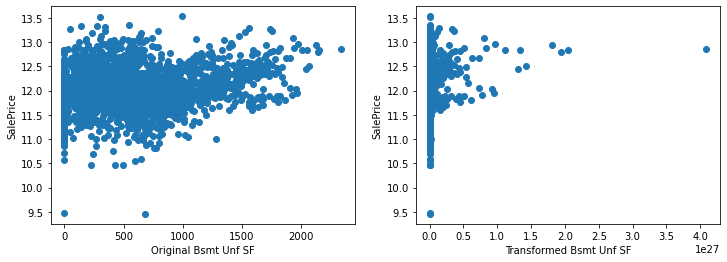

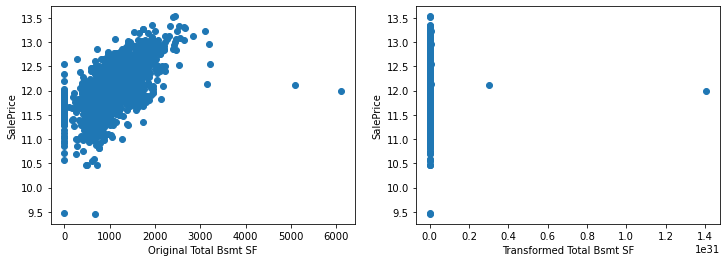

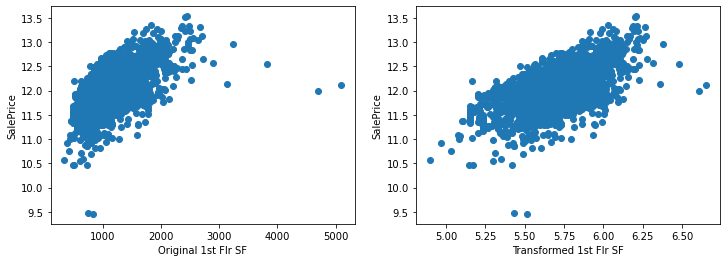

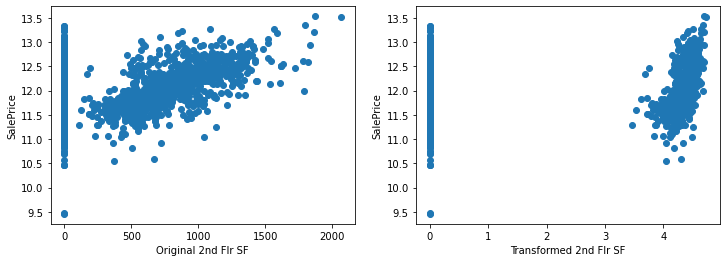

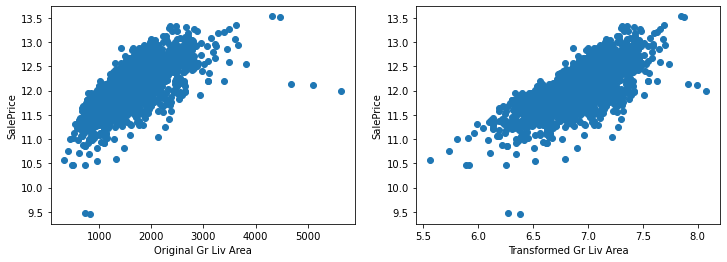

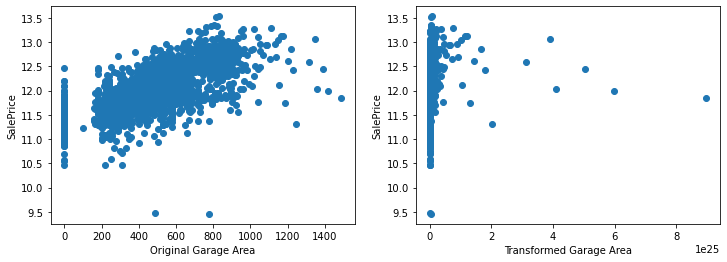

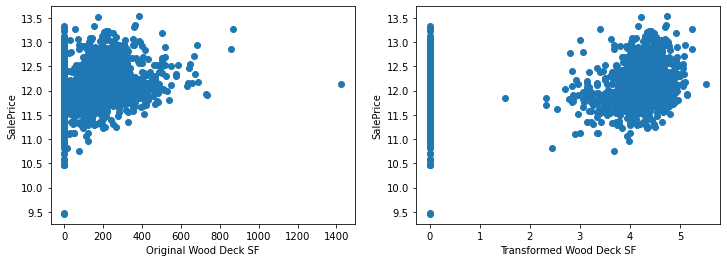

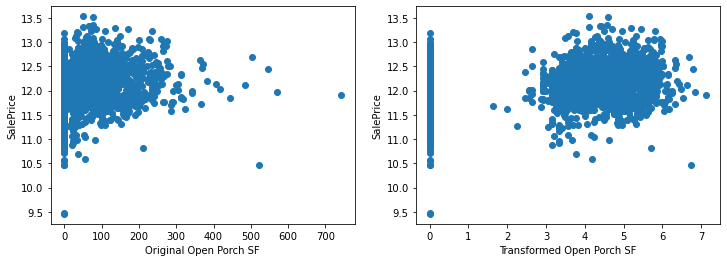

In [33]:
# plot the original and transformed variables beside each other

for var in cont_vars:
    
    plt.figure(figsize=(12,4))
    
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('SalePrice')
    plt.xlabel('Original ' + var)
    
    # plot transformed variable vs Sale Price
    plt.subplot(1,2,2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('SalePrice')
    plt.xlabel('Transformed '+ var)
    
    plt.show()

Visually, we can see that only Lot Area improved with the transformation. The other variables contain the value O so logarithmic function can not be used except for ['Lot Frontage', '1st Flr SF', 'Gr Liv Area'].

### Log Transformation

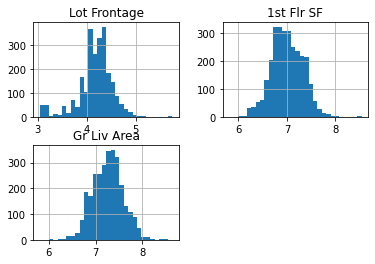

In [34]:
tmp = data.copy()

for var in ['Lot Frontage', '1st Flr SF', 'Gr Liv Area']:
    # transform 
    tmp[var] = np.log(data[var])

tmp[['Lot Frontage', '1st Flr SF', 'Gr Liv Area']].hist(bins=30)

plt.show()

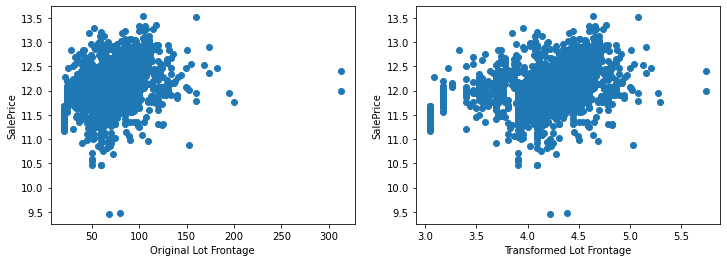

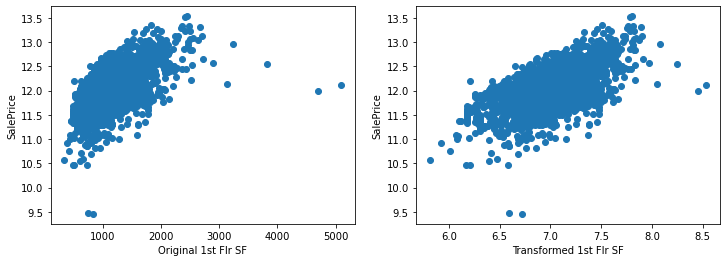

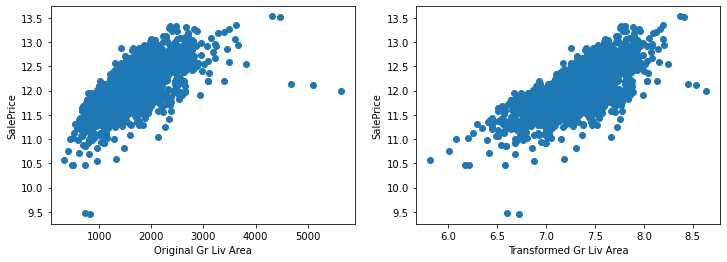

In [35]:
# Let's plot the original or transformed vartiables vs sale price

for var in ['Lot Frontage', '1st Flr SF', 'Gr Liv Area']:
    
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('SalePrice')
    plt.xlabel('Original '+ var)
    
    
    plt.subplot(1,2,2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('SalePrice')
    plt.xlabel('Transformed '+ var)
    
    plt.show()
    

The transformed variables show a better spread of values which may in turn help make better predictions.

### Skewed Variables

Transform the extremely skewed variables into binary data and see if they are predictive

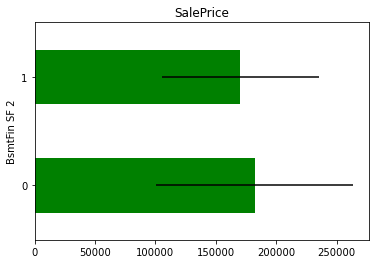

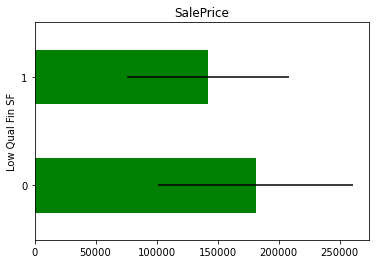

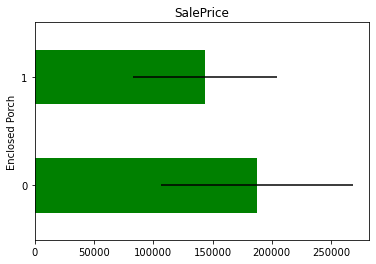

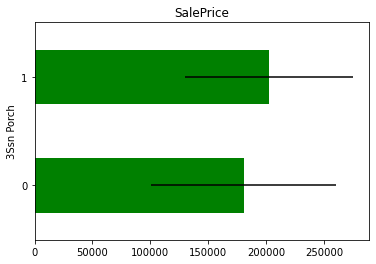

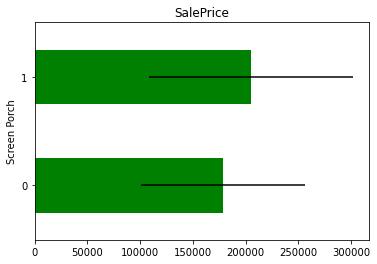

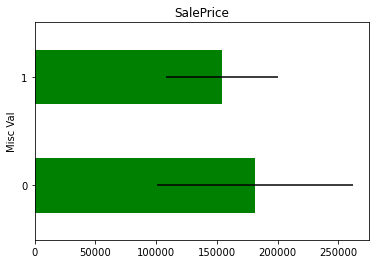

In [36]:
for var in skewed:
    tmp = data.copy()
    # leave all 0's as 0 otherwise it will be 1
    tmp[var] = np.where(data[var]==0,0,1)
    
    tmp = tmp.groupby(var)['SalePrice'].agg(['mean', 'std'])
    tmp.plot(kind='barh', y='mean', legend=False,
            xerr='std', title='SalePrice',color='green')
    plt.show()

There seem to be a difference in Sale Price of the transformed variables but confidence intervals overlap, which most likely signal that it is not predictive.

### Categorical Variables

In [37]:
print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  44


In [38]:
# visualize
data[cat_vars]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,MS SubClass
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,TA,TA,CBlock,TA,Gd,Gd,BLQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Gd,Attchd,Fin,TA,TA,P,NaN,NaN,NaN,WD,Normal,20
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,20
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,20
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal,20
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,80
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,Av,BLQ,ALQ,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,20
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,85
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,Av,ALQ,LwQ,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,20


### Number of labels: Cardinality

<AxesSubplot:>

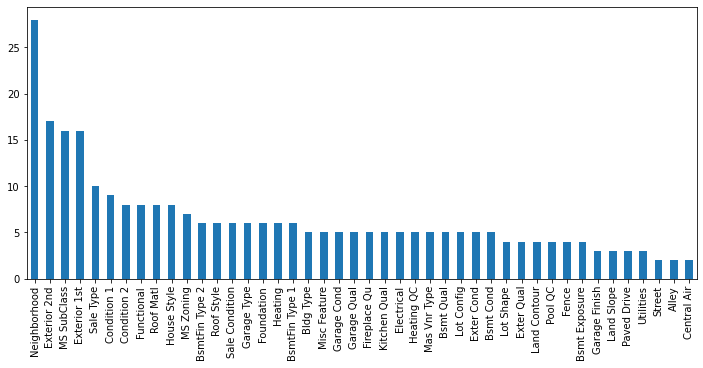

In [39]:
# Evaluate how many differenct categories in each variable

data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

### Quality variables
In some variables, there are a number of quality rankings. These will be replaced with numbers

In [40]:
# remap the quality strings to numbers

qual_mappings = {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'Missing':0, 'NA':0}

qual_vars = ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond',
             'Heating QC', 'Kitchen Qual', 'Fireplace Qu',
             'Garage Qual', 'Garage Cond',]

for var in qual_vars:
    data[var]=data[var].map(qual_mappings)

In [41]:
data['Bsmt Exposure'] .value_counts()

No    1906
Av     418
Gd     284
Mn     239
Name: Bsmt Exposure, dtype: int64

In [42]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0}

data['Bsmt Exposure'] = data['Bsmt Exposure'].map(exposure_mappings)

In [43]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFin Type 1', 'BsmtFin Type 2']

for var in finish_vars:
    data[var] = data[var].map(finish_mappings)

In [44]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'Garage Finish'

data[var] = data[var].map(garage_mappings)

In [45]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

data[var] = data[var].map(fence_mappings)

In [46]:
# capture all quality variables

qual_vars  = qual_vars + finish_vars + ['Bsmt Exposure','Garage Finish','Fence']

In [47]:
len(qual_vars)

14

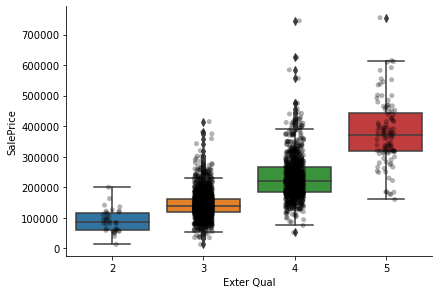

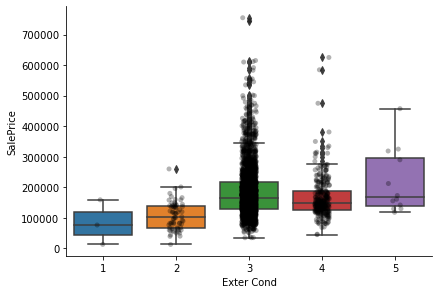

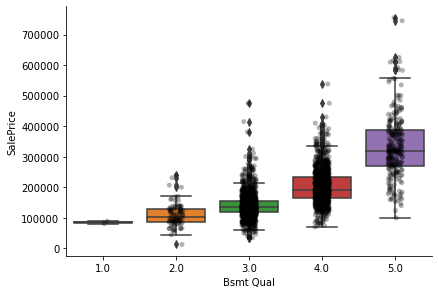

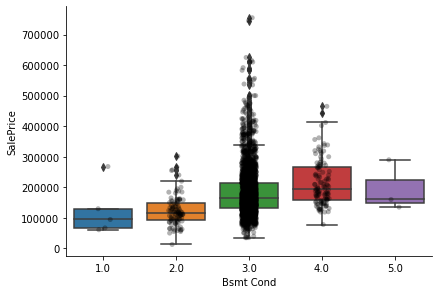

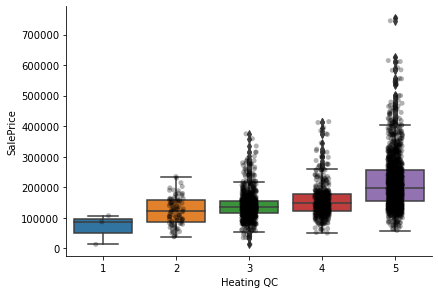

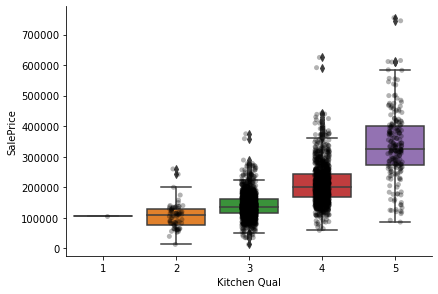

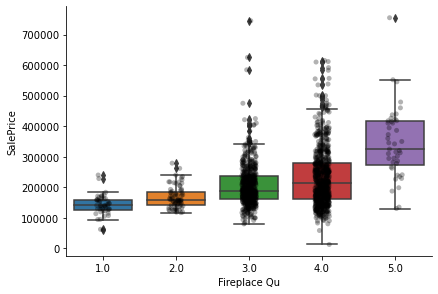

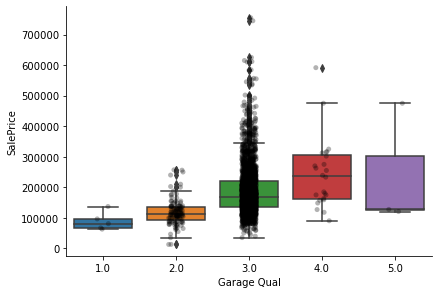

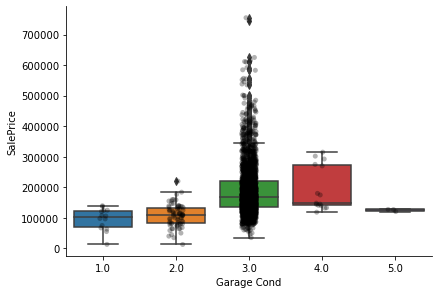

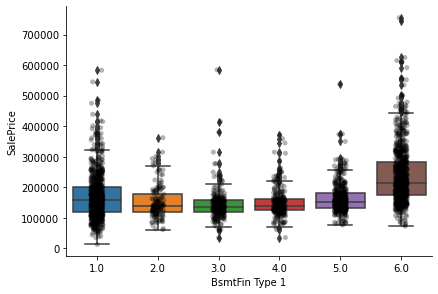

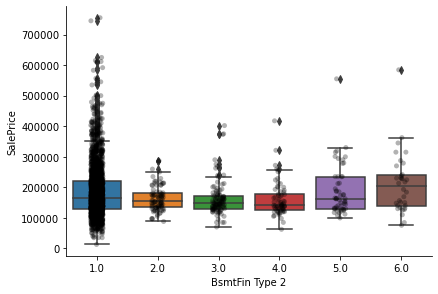

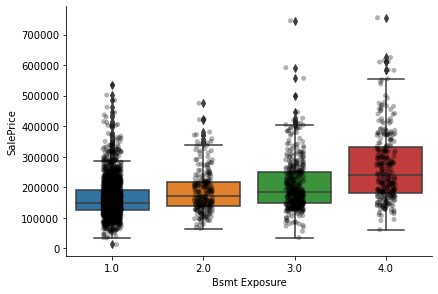

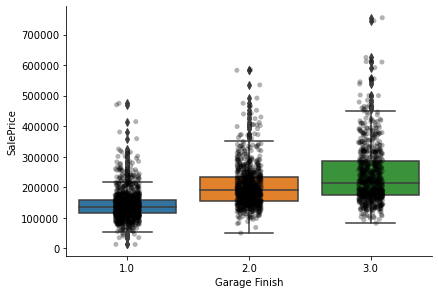

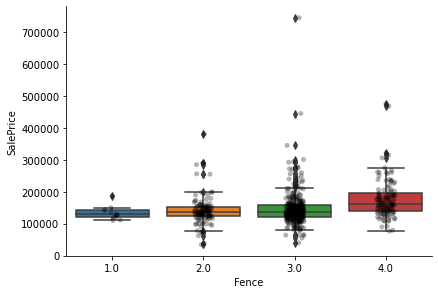

In [48]:
# plot the mean house sale price based on the quality

for var in qual_vars:
    
    # create boxplot with catplot
    sns.catplot(x = var, y='SalePrice', data=data, kind='box', height=4, aspect=1.5)
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

It is clear in some variables of the relationship between house price and value of the variable.

In [49]:
# capture the remaining categorical variables that were not mapped

cat_others = [var for var in cat_vars if var not in qual_vars]

len(cat_others)

30

### Rare Labels

In [50]:
def analyze_rare_labels(df, var, perc):
    df = df.copy()
    
    tmp = df[var].value_counts()/len(df)
    
    return tmp[tmp<perc]

for var in cat_others:
    print(analyze_rare_labels(data,var,0.01))
    print()
    
    

RH         0.009215
C (all)    0.008532
A (agr)    0.000683
I (all)    0.000683
Name: MS Zoning, dtype: float64

Grvl    0.004096
Name: Street, dtype: float64

Series([], Name: Alley, dtype: float64)

IR3    0.005461
Name: Lot Shape, dtype: float64

Series([], Name: Land Contour, dtype: float64)

NoSewr    0.000683
NoSeWa    0.000341
Name: Utilities, dtype: float64

FR3    0.004778
Name: Lot Config, dtype: float64

Sev    0.005461
Name: Land Slope, dtype: float64

Blmngtn    0.009556
Veenker    0.008191
NPkVill    0.007850
Blueste    0.003413
Greens     0.002730
GrnHill    0.000683
Landmrk    0.000341
Name: Neighborhood, dtype: float64

RRAe    0.009556
PosA    0.006826
RRNn    0.003072
RRNe    0.002048
Name: Condition 1, dtype: float64

Feedr     0.004437
Artery    0.001706
PosA      0.001365
PosN      0.001365
RRNn      0.000683
RRAn      0.000341
RRAe      0.000341
Name: Condition 2, dtype: float64

Series([], Name: Bldg Type, dtype: float64)

2.5Unf    0.008191
1.5Unf    0.006485
2

Some variables show multiple categories that represent small percentages. These can cause over-fitting of machine learning models, then explore the relationship with the remaining categories in the variable with house price.

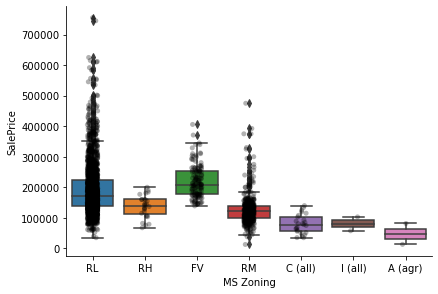

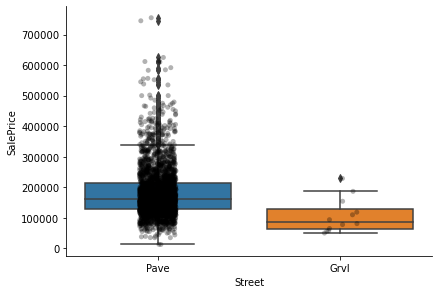

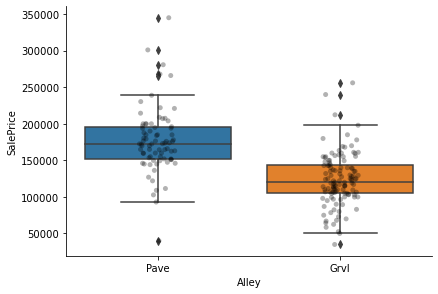

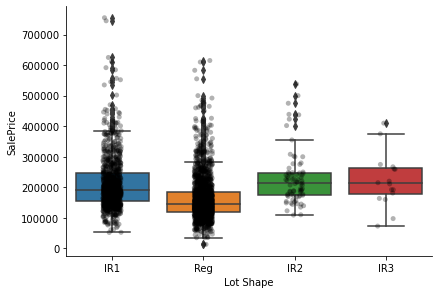

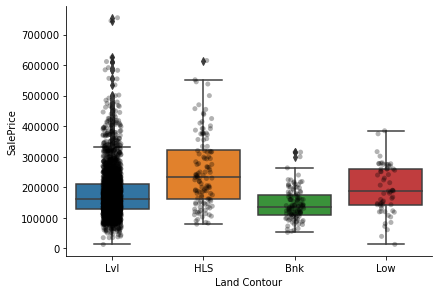

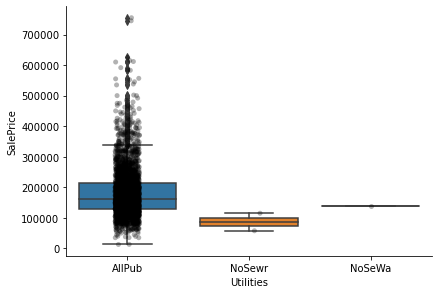

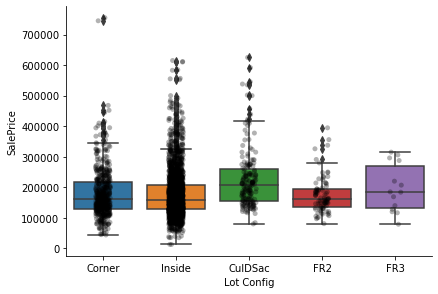

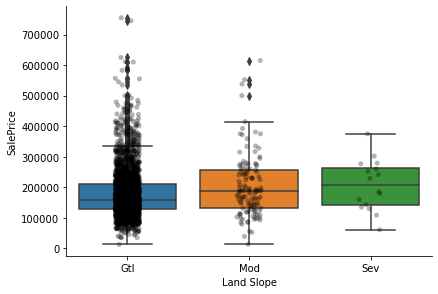

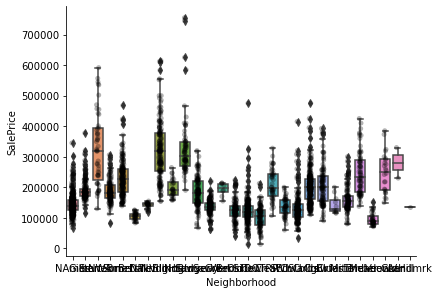

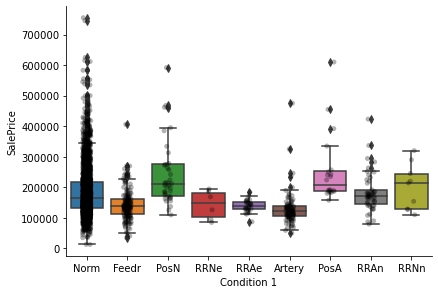

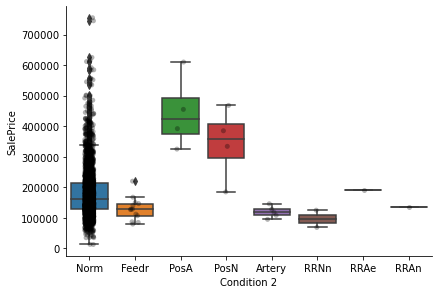

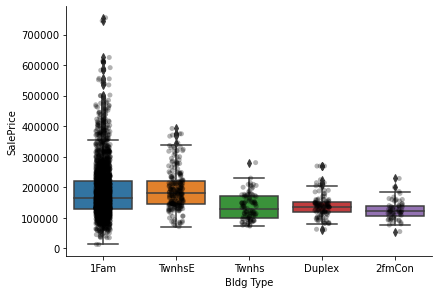

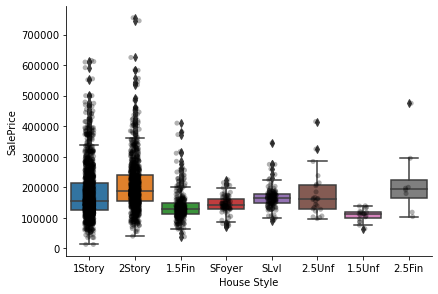

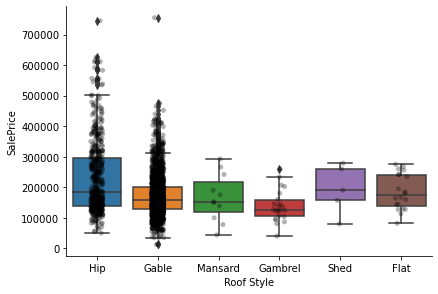

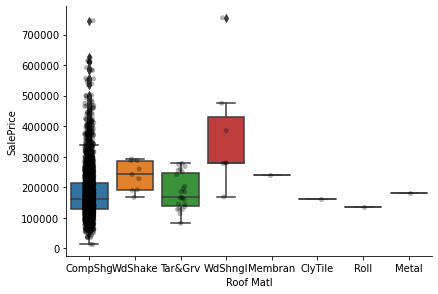

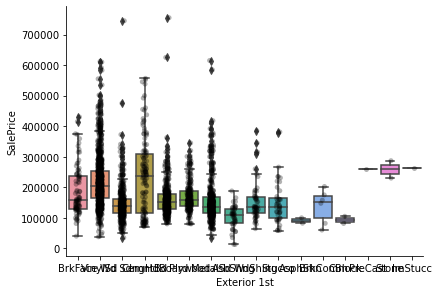

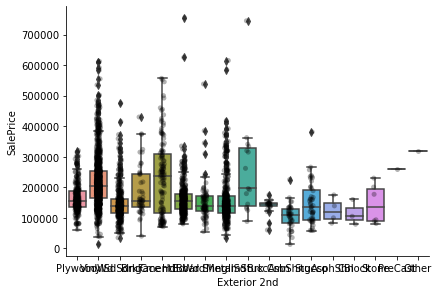

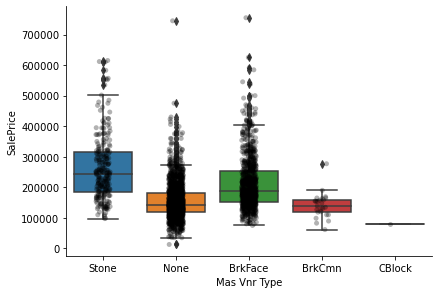

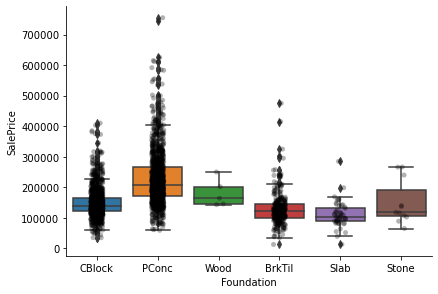

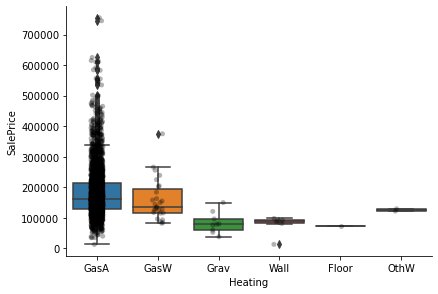

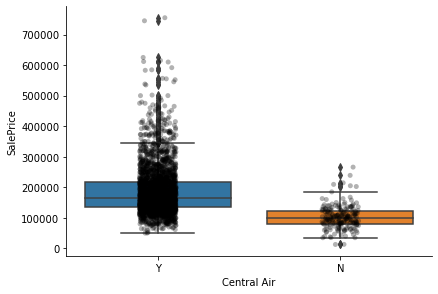

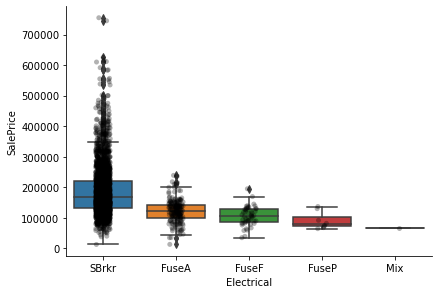

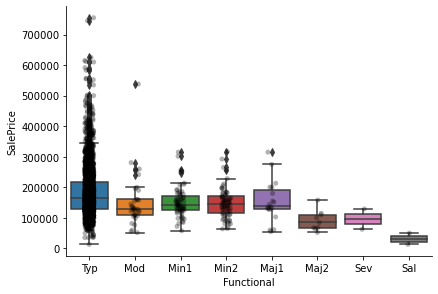

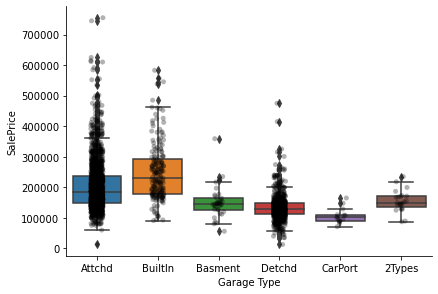

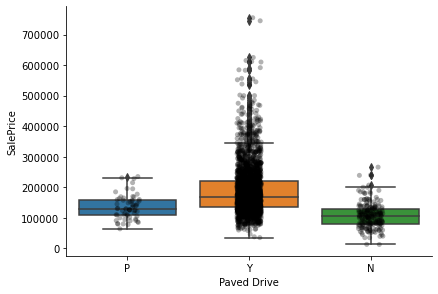

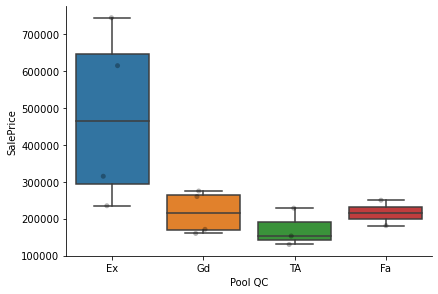

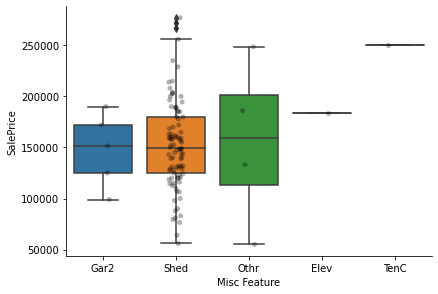

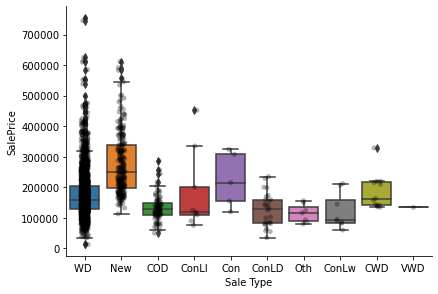

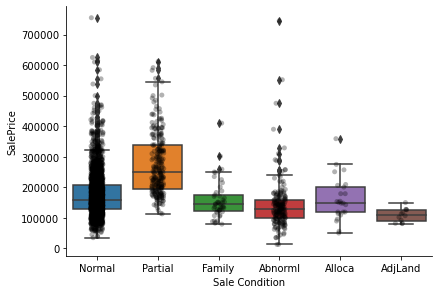

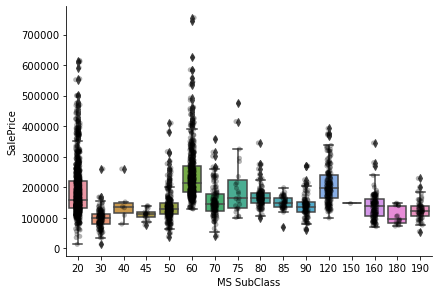

In [51]:
for var in cat_others:
    sns.catplot(x=var, y='SalePrice', data=data, kind='box', height=4, aspect=1.5)
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

In [52]:
data['MS Zoning'].value_counts()/len(data)

RL         0.775768
RM         0.157679
FV         0.047440
RH         0.009215
C (all)    0.008532
A (agr)    0.000683
I (all)    0.000683
Name: MS Zoning, dtype: float64

Clearly the categories show information regarding Sale Price. 